<a href="https://colab.research.google.com/drive/1xI6VQb1VicdR1HQkAkXncnRXNVJT3mUX?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install the required packages

In [ ]:
!pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.0 MB/s eta 0:00:00


#Load the required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import PolynomialModel
from lmfit.models import ExpressionModel

#Load Mock dataset

In [ ]:
# Define the data with large errorbar
# x = np.array((1.0, 2.0, 3.0, 4.0, 5.0))
# y = np.array((2.3, 6.1, 8.2, 4.1, 15.0))
# yerr = np.array([0.4, 0.6, 1. , 0.8, 1.4])

In [ ]:
x=np.array((1.0,2.0,3.0,4.0,5.0))
y=np.array((2.3,4.1,6.2,8.1,10.0))
yerr=np.array((0.08, 0.12, 0.2 , 0.16, 0.28))

#Plot datapoint

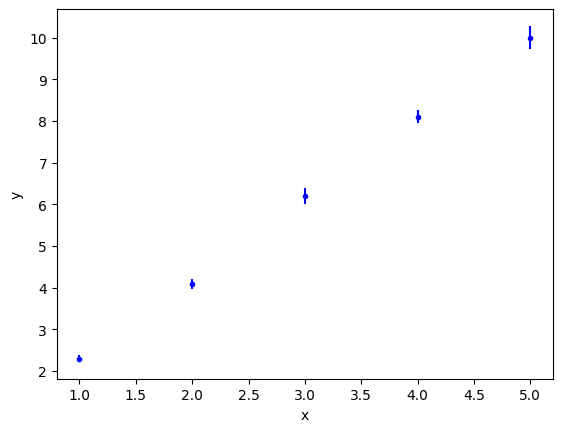

In [ ]:
plt.errorbar(x,y,yerr,fmt='b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Run lmfit package

In [ ]:
mod = ExpressionModel('a+b*x')
pars = mod.make_params(a=0, b=0)
result = mod.fit(y, pars, x=x, weights=1.0/yerr)

##Print results

In [ ]:
print(result.fit_report())

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 1.01584378
    reduced chi-square = 0.33861459
    Akaike info crit   = -3.96859168
    Bayesian info crit = -4.74971585
    R-squared          = 0.97302019
[[Variables]]
    a:  0.34119666 +/- 0.06303399 (18.47%) (init = 0)
    b:  1.93139131 +/- 0.02738371 (1.42%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.8475


In [ ]:
# Assuming you have already obtained the `result` object from the fitting process

# Extracting the parameters and their uncertainties
a_fit = result.params['a'].value
b_fit = result.params['b'].value
sig_a = result.params['a'].stderr  # Uncertainty as a percentage of the parameter value
sig_b = result.params['b'].stderr  # Uncertainty as a percentage of the parameter value

# Printing the values
print("Fitted a =", a_fit)
print("Fitted b =", b_fit)
print("Uncertainty in a =", sig_a)
print("Uncertainty in b =", sig_b)


Fitted a = 0.3411966622396123
Fitted b = 1.9313913103523743
Uncertainty in a = 0.06303399306910779
Uncertainty in b = 0.027383705791269596


# Plot Contours

<ipython-input-18-ff6dd6aff7d7>:17: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(A, B, chi_sq, levels=[delta_chisq], colors='blue', linestyles='dashed', label='68% CL')
<ipython-input-18-ff6dd6aff7d7>:21: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(A, B, chi_sq, levels=[delta_chisq_95], colors='green', linestyles='dashed', label='95% CL')


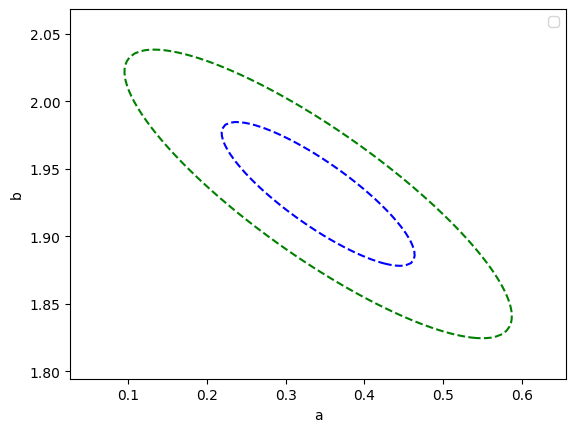

Fitted a = 0.3411966622396123 +/- 0.06303399306910779
Fitted b = 1.9313913103523743 +/- 0.027383705791269596


In [ ]:

def model_func(x, a, b):
    return a + b * x
a_error, b_error = sig_a,sig_b

# Calculate the confidence level contours
delta_chisq = 2.30  # 68% confidence level (2 degrees of freedom)
a_vals = np.linspace(a_fit - 5 * a_error, a_fit + 5 * a_error, 100)
b_vals = np.linspace(b_fit - 5 * b_error, b_fit + 5 * b_error, 100)
A, B = np.meshgrid(a_vals, b_vals)
chi_sq = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        model_vals = model_func(x, A[i, j], B[i, j])
        chi_sq[i, j] = np.sum(((y - model_vals) / yerr) ** 2)

# Plot the 68% confidence level contour
plt.contour(A, B, chi_sq, levels=[delta_chisq], colors='blue', linestyles='dashed', label='68% CL')

# Calculate the confidence level contours for 95% (6.18 for 2 degrees of freedom)
delta_chisq_95 = 6.18
plt.contour(A, B, chi_sq, levels=[delta_chisq_95], colors='green', linestyles='dashed', label='95% CL')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()

# Print the fitted parameters and their errors
print("Fitted a =", a_fit, "+/-", a_error)
print("Fitted b =", b_fit, "+/-", b_error)


##Plot Mock Data best fit curve and Save outputs

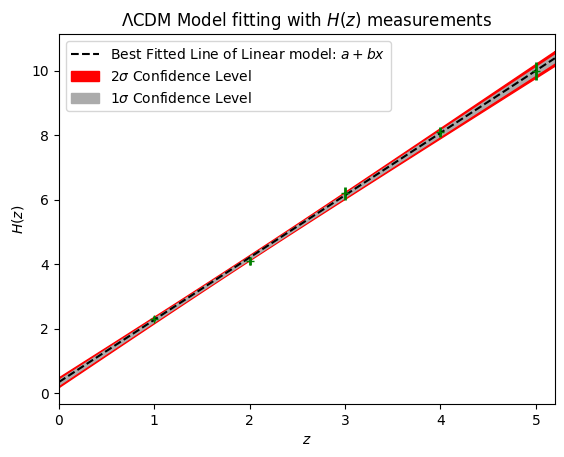

In [ ]:
xfine = np.arange(0,5.2,0.001)
ypred = result.eval(x=xfine)
dely = result.eval_uncertainty(x=xfine, sigma=1)
plt.errorbar(x, y, yerr, linewidth=2, color='g', ls='none', mfc='r', marker='+', markersize=6)
plt.plot(xfine, ypred, 'k--',label='Best Fitted Line of Linear model: $a+bx$')
plt.fill_between(xfine, ypred-2*dely, ypred+2*dely, color="r",label="$2\sigma$ Confidence Level")
plt.fill_between(xfine, ypred-dely, ypred+dely, color="#ABABAB",label="$1\sigma$ Confidence Level")
plt.title('$\Lambda$CDM Model fitting with $H(z)$ measurements')
plt.xlim(0,5.2)
plt.grid(False)
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(loc="upper left")
plt.savefig('Linear_model_fit_mock_data_u_lmfit.pdf', format='pdf', dpi=1200)
